In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2022-11-05 11:52:13.104324: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-05 11:52:13.104398: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Mochila

Esse notebook tem como objetivo solucionar o problema da mochila, na qual têm como objetivo maximizar o beneficio(v) sem ultrapassar o peso da mochila(cap), cada beneficio tem seu peso(w).

In [4]:
class Bag:
    
    def __init__(self, cap, weight, value, qtdSolution):
        self.weight = np.array(weight)
        self.value = np.array(value)
        self.cap = cap
        
        self.size = np.array(weight).shape[0]
        self.qtdSolution = qtdSolution
        
        self.solutions = np.zeros((qtdSolution, self.size))
        
        for i in range(qtdSolution):
            for j in range(self.size):
                self.solutions[i][j] = np.random.randint(0,2)
        
        
        
    def getRo(self):
        return np.array(self.weight/self.value).max()
    
    def penalizacao(self, x):
        aux = np.sum(x*self.weight)
        aux = aux - cap
        
        
        return self.getRo()*aux
    
    def fitness(self, x):
        
        aux = np.sum(self.value*x)
        
        if(aux > cap):
            aux = aux - self.penalizacao(x)
            
        return aux
    
    
    def crossover(self, father, mother):
        father = np.array(father)
        mother = np.array(mother)
        size = father.shape[0]
        
        children = np.zeros((2, size))
        for i in range(size):
            
            if(np.random.randint(0,2) == 0):
                children[0][i] = father[i]
                children[1][i] = mother[i]
            else:
                children[1][i] = father[i]
                children[0][i] = mother[i]
                
        
        return children
    
    
    
    def mutation(self, x, prob):
        x = np.array(x)
        
        size = x.shape[0]
        
        for i in range(size):
            random = np.random.random()
            
            if (random > prob):
                x[i] = int(not(x[i]))
                
        return x
    
    def getMeanFitness(self):
        mean = 0
        for i in self.solutions:
            mean = mean + self.fitness(i)
            
        mean/(self.qtdSolution)
        return mean
    
    def getMeanCapacidadeMochila(self):
        mean = 0
        
        for i in self.solutions:
            mean = mean + np.sum(self.value * i)
            
        mean = mean/(self.qtdSolution)
        return mean 
    
    def getMeanWeight(self):
        mean = 0
        
        for i in self.solutions:
            mean = mean + np.sum(self.weight * i)
            
        mean = mean/(self.qtdSolution)
        return mean 
    
    def getWeight(self, x):
        return np.sum(self.weight * x)
    
    def getCapacidade(self, x):
        return np.sum(self.value * x)
    
    
    def selectBest(self, father, mother, childrens, pos1,pos2):
        result = np.zeros((2,mother.shape[0]))

        
        aux = np.array([father, mother, childrens[0], childrens[1]])
        fitness= np.array(list(map(self.fitness,aux)))
        fitness =  np.argsort(fitness)[::-1][:4]
    

        for i in range(4):
            if self.getWeight(aux[fitness[i]]) <= self.cap:
                self.solutions[pos1] = aux[fitness[i]]

                fitness = np.delete(fitness,i)
                break

        for i in range(3):
            if self.getWeight(aux[fitness[i]]) <= self.cap:
                self.solutions[pos2] = aux[fitness[i]]
                break
            
            
      
                
                
    def getParents(self, paisSelecionado):
        aux1 = -1
        aux2 = -1
        var1 = 0
        while (aux1 == aux2 and aux1 == -1 and aux2 == -1 and var1 == 0):
            aux1 = np.random.randint(0, self.qtdSolution )
            aux2 = np.random.randint(0, self.qtdSolution)
            
            if(paisSelecionado[aux1]== paisSelecionado[aux2] == 0):
                var1 = 1
                paisSelecionado[aux1] = 1
                paisSelecionado[aux2] = 1
        
        return self.solutions[aux1], self.solutions[aux2],aux1, aux2, paisSelecionado
    
    def geneticAlgorithm(self,qtd):
      
        i = 0
        half = int(self.solutions.shape[0]/2)
        vetorFitness = np.zeros(qtd)
        vetorCapMochila = np.zeros(qtd)
        vetorWeight = np.zeros(qtd)
        while(i < qtd):
            j = 0
            paisSelecionado = np.zeros(self.qtdSolution)
            for j in range(self.size):
                
                
                father, mother,pos1,pos2,paisSelecionado = self.getParents(paisSelecionado)
                
                children = self.crossover(father=father, mother=mother)
                
                prob = np.random.random()
                children[0] = self.mutation(children[0],prob)
                children[1] = self.mutation(children[1],prob)
                
                self.selectBest(father, mother, children,pos1,pos2)
                  
            vetorFitness[i] = self.getMeanFitness() 
            vetorCapMochila[i] = self.getMeanCapacidadeMochila() 
            vetorWeight[i] = self.getMeanWeight()
            
            
            i = i + 1
            
        return vetorFitness,vetorCapMochila,vetorWeight
        
    

In [5]:
cap = 35
qtdSolution = 50
weight = np.array([10,18,12,14,13,11,8,6])
ben = np.array([5,8,7,6,9,5,4,3])

v = Bag(cap, weight,ben, qtdSolution)

vetorFitness, vetorCap, vetorPeso = v.geneticAlgorithm(300)


Text(0.5, 1.0, 'Função de aptidão')

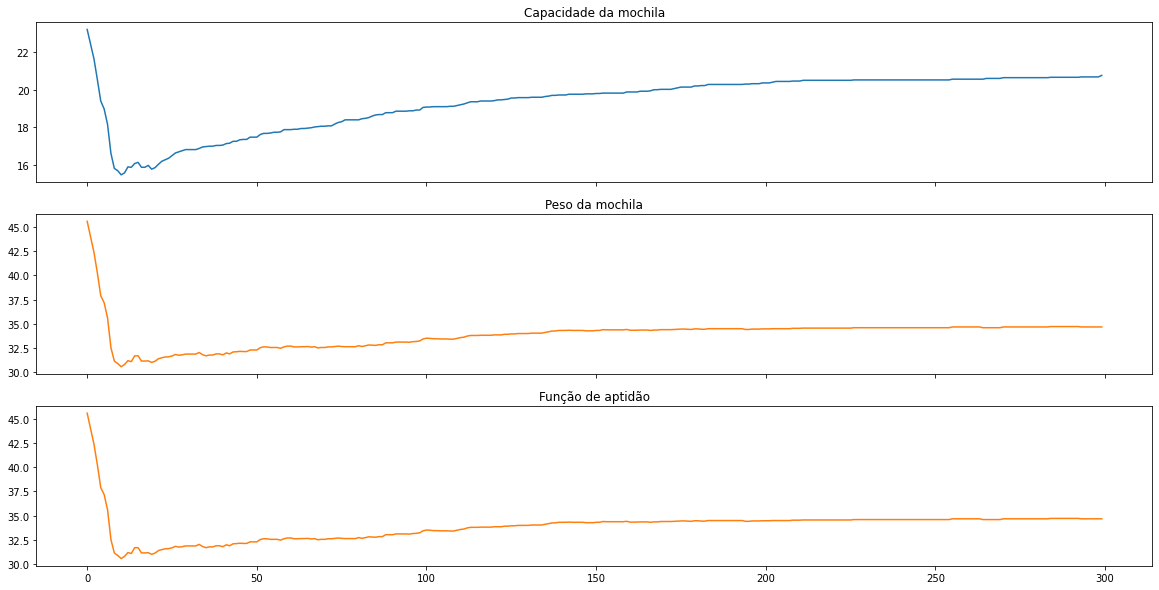

In [6]:
fig, axs = plt.subplots(3,1, sharex=True,figsize=(20, 10))
axs[0].plot(vetorCap)
axs[0].set_title('Capacidade da mochila')
axs[1].plot(vetorPeso, 'tab:orange')
axs[1].set_title('Peso da mochila')
axs[2].plot(vetorPeso, 'tab:orange')
axs[2].set_title('Função de aptidão')

In [7]:
np.array(list(map(v.getCapacidade, v.solutions)))

array([21., 21., 21., 21., 21., 21., 21., 21., 21., 20., 21., 21., 21.,
       21., 21., 20., 21., 19., 21., 21., 18., 21., 21., 21., 21., 21.,
       21., 20., 20., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21.,
       21., 20., 19., 21., 21., 21., 21., 21., 21., 21., 21.])

In [8]:
arg = int(np.array(list(map(v.getCapacidade, v.solutions))).argmax())

In [9]:
arg

0

In [10]:
v.solutions[arg]*ben

array([5., 0., 7., 0., 9., 0., 0., 0.])

In [11]:
np.sum(v.solutions[arg]*ben)

21.0

In [12]:
v.solutions[arg]*weight

array([10.,  0., 12.,  0., 13.,  0.,  0.,  0.])

In [13]:
np.sum(v.solutions[arg]*weight)

35.0

### Foi possível observar que o algoritmo conseguiu maximar a capacidade da mochila sem ultrapassar o limite maximo de peso mochila que seria 35 kg. Nesse sentido, houve no inicio uma queda da capacidade para que o maximo de peso fosse menor que 35 kg. Isso se deve ao fato que o fator de penalização era muito alto. Após isso cumprido, foi maximizando a capacidade sem ultrapassar o peso maximo. 

### Assim, foi escolhido os objetos 1,3 e o 5.